In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
housing_data = pd.read_csv('housing.csv')
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14858,-117.08,32.65,17.0,2633.0,712.0,1487.0,694.0,2.5392,147000.0,NEAR OCEAN
13588,-117.29,34.12,45.0,1369.0,351.0,1046.0,274.0,1.8438,72100.0,INLAND
14016,-117.16,32.75,23.0,2474.0,594.0,1107.0,536.0,2.9705,245500.0,NEAR OCEAN
6079,-117.85,34.09,16.0,4556.0,639.0,2066.0,651.0,6.4667,263900.0,<1H OCEAN
3008,-119.01,35.28,10.0,7011.0,1453.0,4163.0,1307.0,2.7659,77500.0,INLAND


Text(0, 0.5, 'median_house_value')

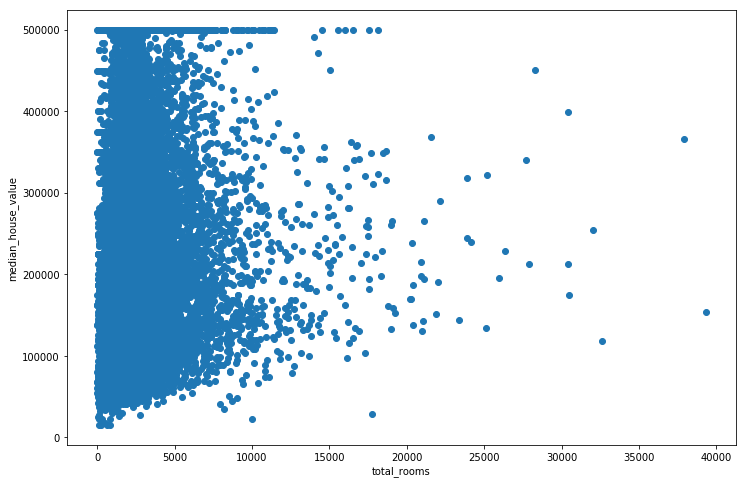

In [34]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(housing_data['total_rooms'], housing_data['median_house_value'])
plt.xlabel("total_rooms")
plt.ylabel("median_house_value")

In [30]:
housing_data = housing_data.dropna()

In [31]:
housing_data.shape

(20433, 10)

In [33]:
housing_data.loc[housing_data['median_house_value']== 500001].count()

longitude             958
latitude              958
housing_median_age    958
total_rooms           958
total_bedrooms        958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

In [42]:
housing_data = housing_data.drop(housing_data.loc[housing_data['median_house_value']== 500001].index)

In [43]:
housing_data.shape

(19475, 10)

In [44]:
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [50]:
housing_data = pd.get_dummies(housing_data, columns=['ocean_proximity'])

In [51]:
housing_data.shape

(19475, 14)

In [52]:
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2693,-115.39,32.76,16.0,1136.0,196.0,481.0,185.0,6.2558,146300.0,0,1,0,0,0
15731,-122.44,37.78,52.0,3017.0,851.0,1588.0,800.0,3.3882,471400.0,0,0,0,1,0
3068,-119.25,35.76,36.0,2332.0,656.0,2175.0,610.0,1.6045,57300.0,0,1,0,0,0
10886,-117.91,33.71,16.0,3113.0,783.0,1719.0,715.0,3.6505,145700.0,1,0,0,0,0
17713,-121.80,37.34,20.0,2686.0,414.0,1507.0,405.0,5.8068,263900.0,1,0,0,0,0


In [54]:
x = housing_data.drop('median_house_value',axis=1)
y = housing_data['median_house_value']

In [56]:
x.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [67]:
from sklearn.model_selection import train_test_split
x_train ,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [68]:
x_train.shape, x_test.shape

((15580, 13), (3895, 13))

In [70]:
y_train.shape, y_test.shape

((15580,), (3895,))

In [74]:

from sklearn.linear_model import LinearRegression

In [80]:
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [81]:
print('Train_score:', linear_model.score(x_train, y_train))

Train_score: 0.6122286316565089


In [82]:
predictors = x_train.columns
predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [86]:
coef = pd.Series(linear_model.coef_, predictors).sort_values()
print(coef)

ocean_proximity_INLAND        -25322.117386
longitude                     -24700.618153
latitude                      -22778.832364
population                       -29.717039
total_rooms                       -7.759047
households                        42.266554
total_bedrooms                    94.300658
housing_median_age               950.462382
ocean_proximity_NEAR BAY        5985.318440
ocean_proximity_<1H OCEAN      12998.687646
ocean_proximity_NEAR OCEAN     16454.855456
median_income                  38693.682845
ocean_proximity_ISLAND        173200.122600
dtype: float64


In [88]:
y_pred = linear_model.predict(x_test)

In [94]:
df_pred_actual = pd.DataFrame({'predicted':y_pred, 'actual:': y_test})
df_pred_actual.head(10)

,predicted,actual:
1997,81198.671271,52600.0
773,233418.135984,172700.0
2226,291475.571640,187300.0
16276,58798.577766,53000.0
14149,131011.890681,111300.0
15020,228095.427718,174400.0
19245,270133.240658,252100.0
578,253602.623919,248600.0
1443,227537.086093,193200.0
19439,265977.140961,182400.0


In [95]:
from sklearn.metrics import r2_score

In [98]:
print("Test_score:", r2_score(y_test, y_pred))

Test_score: 0.615491541586063


Text(0, 0.5, 'y_yest')

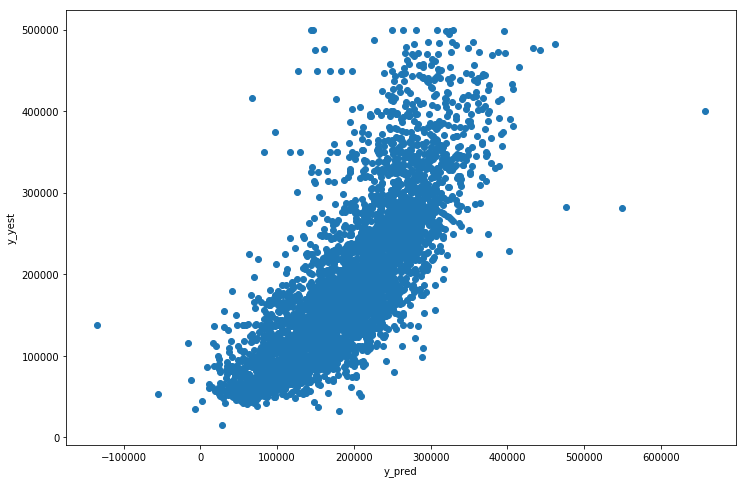

In [100]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(y_pred , y_test)
plt.xlabel("y_pred")
plt.ylabel("y_yest")

In [119]:
df_pred_actual_sample = df_pred_actual.sample(100)
df_pred_actual_sample = df_pred_actual_sample.reset_index(drop=True)

In [120]:
df_pred_actual_sample.head()

,predicted,actual:
0,280995.548184,500000.0
1,184342.916421,184300.0
2,48639.856452,59800.0
3,208884.489805,233700.0
4,153109.999297,74300.0


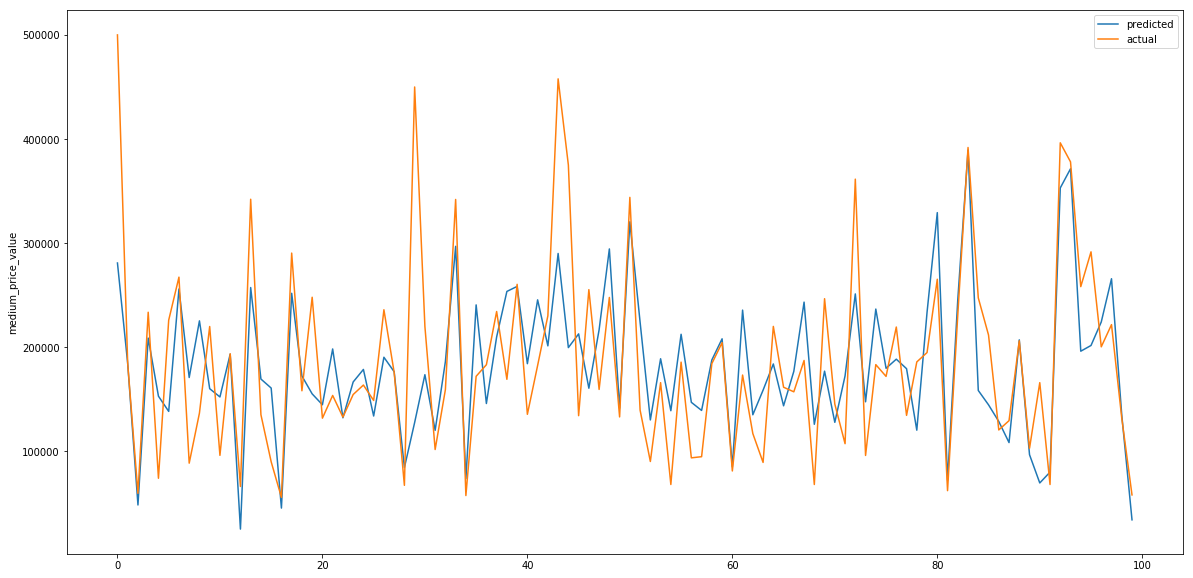

In [137]:
plt.figure(figsize = (20,10))
plt.plot(df_pred_actual_sample ['predicted'], label = 'predicted')
plt.plot(df_pred_actual_sample ['actual:'], label = 'actual')
plt.ylabel('medium_price_value')
plt.legend()
plt.show()
